Model Accuracy: 54.50%

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.49      0.50        94
           1       0.57      0.59      0.58       106

    accuracy                           0.55       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.54      0.55      0.54       200



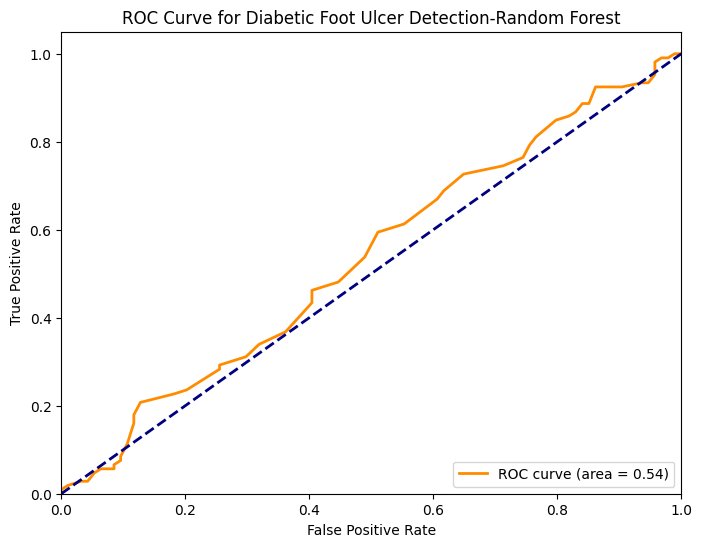

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Create a synthetic dataset
# Let's assume we have 6 features: blood_sugar_level, age, foot_temperature, ulcer_size, ulcer_depth, sensation_loss
np.random.seed(42)
data_size = 1000

data = {
    'blood_sugar_level': np.random.randint(70, 300, size=data_size),   # Random glucose levels
    'age': np.random.randint(30, 80, size=data_size),                  # Random ages between 30 and 80
    'foot_temperature': np.random.uniform(90, 100, size=data_size),    # Random foot temperature (in Fahrenheit)
    'ulcer_size': np.random.uniform(0, 10, size=data_size),            # Ulcer size in cm
    'ulcer_depth': np.random.uniform(0, 5, size=data_size),            # Ulcer depth in cm
    'sensation_loss': np.random.randint(0, 2, size=data_size)          # 1 if sensation loss, 0 otherwise
}

# Target variable: 1 if diabetic foot ulcer detected, 0 otherwise
data['foot_ulcer'] = np.random.randint(0, 2, size=data_size)

df = pd.DataFrame(data)

# Step 2: Define Features (X) and Target (y)
X = df.drop('foot_ulcer', axis=1)
y = df['foot_ulcer']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 6: Make Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Plot ROC Curve
y_scores = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetic Foot Ulcer Detection-Random Forest')
plt.legend(loc="lower right")
plt.show()


Model Accuracy: 54.00%

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.60      0.55        94
           1       0.58      0.49      0.53       106

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.55      0.54      0.54       200



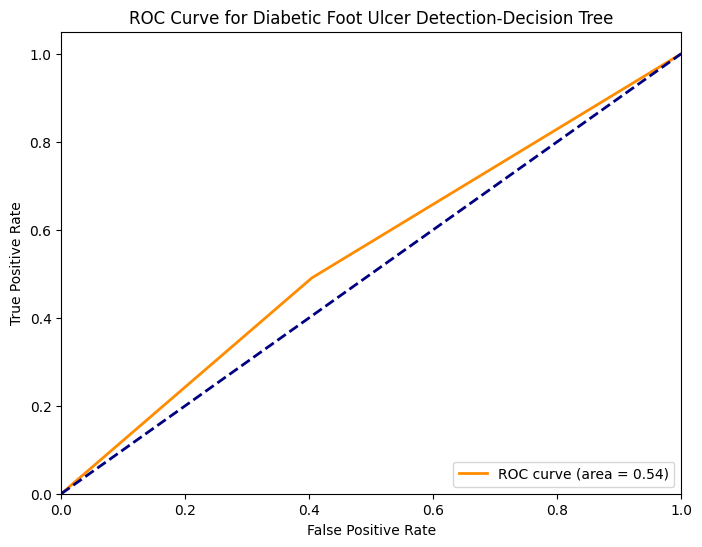

In [ ]:
# Step 5: Train a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Step 6: Make Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Plot ROC Curve
y_scores = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetic Foot Ulcer Detection-Decision Tree')
plt.legend(loc="lower right")
plt.show()

Model Accuracy: 53.50%

Classification Report:Naive Bayes
               precision    recall  f1-score   support

           0       0.51      0.30      0.38        94
           1       0.54      0.75      0.63       106

    accuracy                           0.54       200
   macro avg       0.53      0.52      0.50       200
weighted avg       0.53      0.54      0.51       200



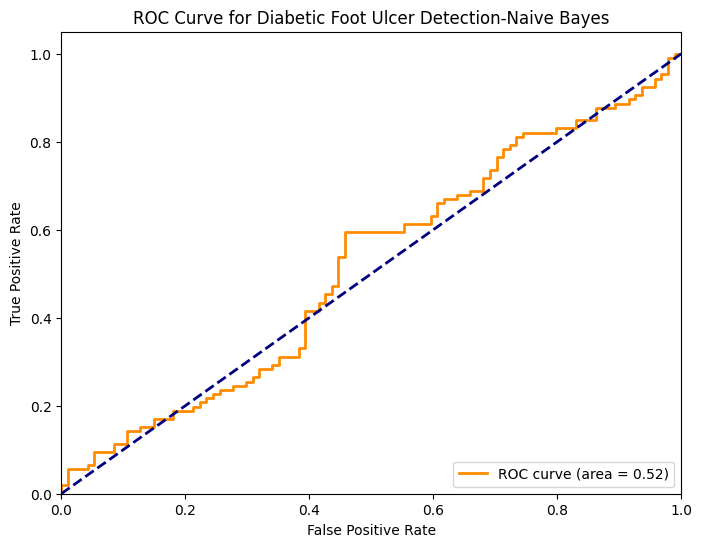

In [ ]:
# Step 5: Train a Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

model = GaussianNB()
model.fit(X_train_scaled, y_train)

# Step 6: Make Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:Naive Bayes\n", classification_report(y_test, y_pred))

# Step 8: Plot ROC Curve
y_scores = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetic Foot Ulcer Detection-Naive Bayes')
plt.legend(loc="lower right")
plt.show()


Model Accuracy: 53.00%

Classification Report:Support Vector Machine
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        94
           1       0.53      1.00      0.69       106

    accuracy                           0.53       200
   macro avg       0.27      0.50      0.35       200
weighted avg       0.28      0.53      0.37       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


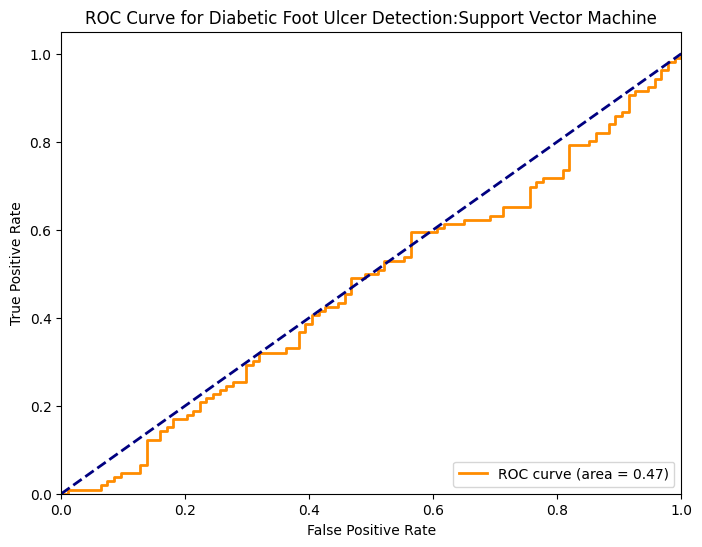

In [ ]:
# Step 6: Train a Support Vector Machine
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 6: Make Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:Support Vector Machine\n", classification_report(y_test, y_pred))

# Step 8: Plot ROC Curve
y_scores = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetic Foot Ulcer Detection:Support Vector Machine')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/seaborn/_

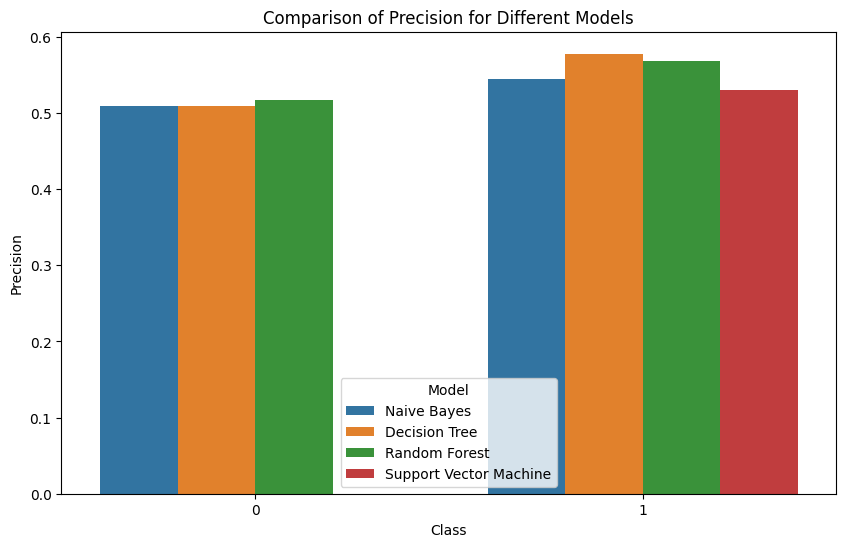

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

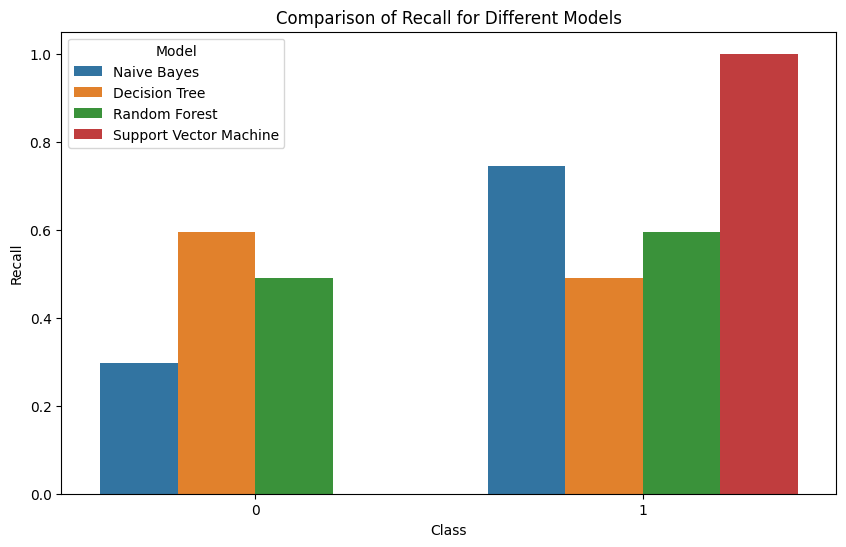

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

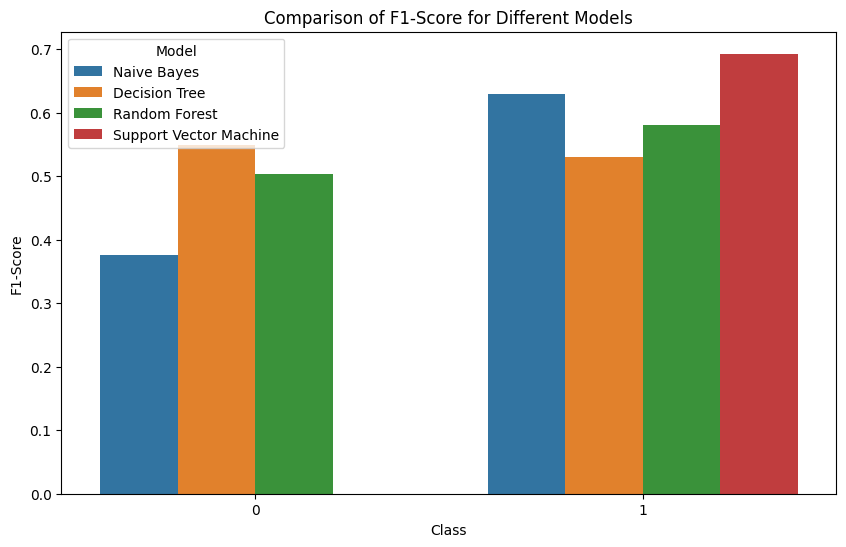

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns


# Initialize the classifiers you want to compare
models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', probability=True, random_state=42)
}

# Dictionary to store classification reports for each model
classification_reports = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_scaled)

    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)  # Store report in dict format

    # Store the report in the dictionary
    classification_reports[name] = report

# Prepare Data for Plotting
def prepare_data_for_plotting(reports):
    rows = []
    for model_name, report in reports.items():
        for class_name, metrics in report.items():
            if class_name not in ['accuracy', 'macro avg', 'weighted avg']:
                rows.append([model_name, class_name, metrics['precision'], metrics['recall'], metrics['f1-score']])
    return pd.DataFrame(rows, columns=["Model", "Class", "Precision", "Recall", "F1-Score"])

# Create DataFrame for plotting
plot_data = prepare_data_for_plotting(classification_reports)

# Plot the metrics
def plot_classification_report(data, metric):
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Class", y=metric, hue="Model", data=data)
    plt.title(f"Comparison of {metric} for Different Models")
    plt.ylabel(metric)
    plt.show()

# Plot Precision, Recall, and F1-Score
plot_classification_report(plot_data, "Precision")
plot_classification_report(plot_data, "Recall")
plot_classification_report(plot_data, "F1-Score")
